# Customizing IPython - Magics

IPython extends Python by adding shell-like commands called **magics**.

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

In [2]:
import numpy

In [3]:
%timeit A=numpy.random.random((1000,1000))

100 loops, best of 3: 18.3 ms per loop


In [4]:
%%timeit -n 1

A=numpy.random.random((1000,1000))
b = A.sum()


1 loops, best of 3: 22.2 ms per loop


## Defining your own magic

As we have seen already, IPython has cell and line magics. You can define your own magics using any Python function and the `register_magic_function` method:

In [5]:
ip = get_ipython()

In [6]:
import time

def sleep_magic(line):
    """A simple function for sleeping"""
    t = float(line)
    time.sleep(t)

In [7]:
ip.register_magic_function?

In [8]:
ip.register_magic_function(sleep_magic, "line", "sleep")

In [9]:
%sleep 2

In [10]:
%sleep?

### Exercise

Define `%tic` and `%toc` magics, which can be use for simple timings, e.g. where

```python
for p in range(1,4):
    N = 10**p
    print "N=%i" % N
    %tic
    A = np.random.random((N,N))
    np.linalg.eigvals(A)
    %toc
```

each `%toc` will print the time since the last `%tic`. Create separate `tic` and `toc` functions that read and write
a global time variable.

In [ ]:
%load soln/tictocf.py

In [13]:
import numpy as np
import sys
for p in range(1,4):
    N = 10**p
    print("N=%i" % N)
    sys.stdout.flush()
    %tic
    A = np.random.random((N,N))
    np.linalg.eigvals(A)
    %toc

N=10
644 µs
N=100
15.8 ms
N=1000
9.05 s


### Cell Magic

**Cell magics** take two args:

1. the **line** on the same line of the magic 
2. the **cell** the multiline body of the cell after the first line

In [14]:
def dummy_cell_magic(line, cell):
    """dummy cell magic for displaying the line and cell it is passed"""
    print("line: %r" % line)
    print("cell: %r" % cell)

ip.register_magic_function(dummy_cell_magic, "cell", "dummy")

In [15]:
%%dummy this is the line
this
is the
cell

line: 'this is the line'
cell: 'this\nis the\ncell'


In [16]:
def parse_magic_line(line):
    """parse a magic line into a name and eval'd expression"""
    name, values_s = line.split(None, 1)
    values = eval(values_s, get_ipython().user_ns)
    return name, values

parse_magic_line("x range(5)")

('x', range(0, 5))

#### Excercise

Can you write and register a **cell magic** that automates the outer iteration,
timing a block for various values of a particular variable:

In [ ]:
%load soln/scalemagic.py

In [19]:
%%scale N [ int(10**p) for p in range(1,4) ]

A = np.random.random((N,N))
np.linalg.eigvals(A)


N=10
562 µs
N=100
15.5 ms
N=1000
9.23 s


In [20]:
%%scale N [ int(2**p) for p in np.linspace(6, 11, 11) ]

A = np.random.random((N,N))
np.linalg.eigvals(A)


N=64
7.77 ms
N=90
10.4 ms
N=128
23 ms
N=181
59.6 ms
N=256
170 ms
N=362
351 ms
N=512
1.46 s
N=724
2.98 s
N=1024
16.9 s
N=1448
37.2 s
N=2048
234 s


## Executing Notebooks

We can load a notebook into memory using `IPython.nbformat`.

In [21]:
import io
import os

import IPython.nbformat as nbf

In [22]:
def load_notebook(filename):
    """load a notebook object from a filename"""
    if not os.path.exists(filename) and not filename.endswith(".ipynb"):
        filename = filename + ".ipynb"
    with io.open(filename) as f:
        return nbf.read(f, as_version=4)


In [23]:
nb = load_notebook("_Sample")

**A notebook is just a dictionary** with attribute access for convenience.

In [24]:
nb.keys()

dict_keys(['cells', 'nbformat', 'nbformat_minor', 'metadata'])

In [25]:
cells = nb.cells
cells

[{'cell_type': 'markdown', 'metadata': {}, 'source': '# A sample notebook'},
 {'cell_type': 'code',
  'execution_count': None,
  'metadata': {'collapsed': False},
  'outputs': [],
  'source': "print('hello')"},
 {'cell_type': 'code',
  'execution_count': None,
  'metadata': {'collapsed': False},
  'outputs': [],
  'source': '%matplotlib inline\nimport matplotlib.pyplot as plt\nimport numpy as np\nplt.plot(np.random.random(100))'},
 {'cell_type': 'markdown',
  'metadata': {},
  'source': 'A function for displaying the summary of a notebook object.\nIt prints a simple summary, such as:\n\n```\n  1   markdown cells, total:   4 lines\n  5       code cells, total:   4 lines\n  1    heading cells, total:   1 lines\n```'},
 {'cell_type': 'code',
  'execution_count': None,
  'metadata': {'collapsed': False},
  'outputs': [],
  'source': 'def nb_info(nb):\n    """display a summary of the contents of a notebook"""\n    cell_counts = {}\n    cell_lines = {}\n    \n    for cell in nb.cells:\n     

We can see all the cells and their type

In [26]:
for cell in cells:
    print()
    print('----- %s -----' % cell.cell_type)
    print(cell.source)


----- markdown -----
# A sample notebook

----- code -----
print('hello')

----- code -----
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.random.random(100))

----- markdown -----
A function for displaying the summary of a notebook object.
It prints a simple summary, such as:

```
  1   markdown cells, total:   4 lines
  5       code cells, total:   4 lines
  1    heading cells, total:   1 lines
```

----- code -----
def nb_info(nb):
    """display a summary of the contents of a notebook"""
    cell_counts = {}
    cell_lines = {}
    
    for cell in nb.cells:
        cell_type = cell.cell_type
        count = cell_counts.setdefault(cell_type, 0)
        lines = cell_counts.setdefault(cell_type, 0)
        cell_counts[cell_type] = count + 1
        try:
            content = cell.source
        except AttributeError:
            content = cell.input
        cell_lines[cell_type] = lines + len(content.splitlines())
    
    for cell_type in cell_cou

Now I can run all of the **code cells** with `get_ipython().run_cell`

hello


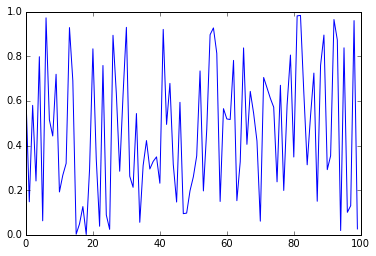

In [27]:
for cell in cells:
    ip = get_ipython()
    if cell.cell_type == 'code':
        ip.run_cell(cell.source, silent=True)

And we can now use the function that was defined in that notebook:

In [28]:
nb_info(nb)

  2   markdown cells, total:   9 lines
  3       code cells, total:  20 lines


### Exercise

Can you write and register an `%nbrun` line magic to run a notebook?

```python
%nbrun Sample
```

In [ ]:
%load soln/nbrun.py

hello


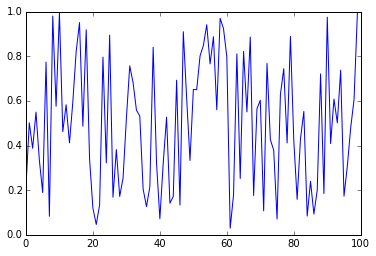

In [31]:
%nbrun _Sample

The common way to make your magics reusable is to [write an Extension](Customizing%20IPython%20-%20Extensions.ipynb), so let's give that a try.